In [33]:
from pandas import HDFStore,DataFrame
import pandas as pd
store = HDFStore('/home/raz/store.h5')

pdata = pd.read_hdf(store)
pdata = pdata.sort_values('Timestamp')

catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)
print(len(NumFeatures), "Continuous Features \n", NumFeatures)
print("\n \n")
print(len(catFeatures), "Categorical features \n\n\n", catFeatures)


NumFeatures.remove("Timestamp")
print("\n \n")

print(len(NumFeatures), "Upadated List of Continuous Features \n", NumFeatures)
print("\n \n")

Opening /home/raz/store.h5 in read-only mode
52 Continuous Features 
 ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603']

 

1 Categorical features 


 ['EVENT']

 

51 Upadated List of Continuous Features 
 ['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT50

In [34]:
pdata['hod'] = pdata['Timestamp'].dt.hour

In [35]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None

In [36]:
bool_cols = [col for col in pdata 
             if pdata[[col]].dropna().isin([0, 1]).all().values]

In [37]:
pdata[bool_cols].describe()

,P202,P401,P404,P502,P601,P603
count,946719.0,946719.0,946719.0,946719.0,946719.0,946719.0
mean,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0


In [38]:
pdata.drop(bool_cols, axis = 1, inplace = True)
catFeatures = []
NumFeatures = []
for col,x in pdata.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        NumFeatures.append(col)
    else:
        catFeatures.append(col)

In [39]:
catFeatures = []
for col in pdata[NumFeatures]:
    if(pdata[[col]].dropna().isin([1, 2]).all().values):
        print(col)
        catFeatures.append(col)
        pdata[col] = pdata[col].astype('category')

P101
P102
P201
P203
P204
P205
P206
P301
P302
P402
P403
UV401
P501
P602


In [40]:
NumFeatures = [x for x in NumFeatures if x not in catFeatures ]
len(NumFeatures) + len(catFeatures) + len(bool_cols)

53

In [41]:
X_cat = pd.get_dummies(pdata , columns=catFeatures[1:])

In [42]:
X_cat.columns

Index(['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'AIT201', 'AIT202',
       'AIT203', 'FIT201', 'MV201', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', 'MV303', 'MV304', 'AIT401', 'AIT402', 'FIT401', 'LIT401',
       'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503',
       'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'EVENT', 'hod',
       'P102_1', 'P102_2', 'P201_1', 'P201_2', 'P203_1', 'P203_2', 'P204_1',
       'P204_2', 'P205_1', 'P205_2', 'P206_1', 'P206_2', 'P301_1', 'P301_2',
       'P302_1', 'P302_2', 'P402_1', 'P402_2', 'P403_1', 'P403_2', 'UV401_1',
       'UV401_2', 'P501_1', 'P501_2', 'P602_1', 'P602_2'],
      dtype='object')

In [43]:
dummies = ['P102_1', 'P102_2', 'P201_1', 'P201_2', 'P203_1', 'P203_2', 'P204_1',
'P204_2', 'P205_1', 'P205_2', 'P206_1', 'P206_2', 'P301_1', 'P301_2', 'P302_1', 'P302_2', 'P402_1', 'P402_2', 'P403_1', 'P403_2', 'UV401_1',
'UV401_2', 'P501_1', 'P501_2', 'P602_1', 'P602_2']

In [61]:
y = pdata['EVENT'] == 'Attack'

In [48]:
X.hod

449919    16
449920    16
449921    16
449922    16
449923    16
449924    16
449925    16
449926    16
449927    16
449928    16
449929    16
449930    16
449931    16
449932    16
449933    16
449934    16
449935    16
449936    16
449937    16
449938    16
449939    16
449940    16
449941    16
449942    16
449943    16
449944    16
449945    16
449946    16
449947    16
449948    16
          ..
449889    14
449890    14
449891    14
449892    14
449893    14
449894    14
449895    14
449896    14
449897    14
449898    14
449899    14
449900    14
449901    14
449902    14
449903    14
449904    14
449905    14
449906    14
449907    14
449908    14
449909    14
449910    14
449911    14
449912    14
449913    14
449914    14
449915    14
449916    14
449917    14
449918    14
Name: hod, Length: 946719, dtype: int64

In [187]:
from time import time
from sklearn.model_selection import train_test_split

X = X_cat[NumFeatures[1:] + dummies]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.25)

In [188]:
len(X_test.columns)

58

In [152]:
%%time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

from sklearn.model_selection import learning_curve
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import xgboost as XGB
xgb = XGB.XGBClassifier(seed=42, max_depth=3, objective='binary:logistic', n_estimators=400)
parameters = {'learning_rate':[0.1], 'reg_alpha':[3.0], 'reg_lambda': [4.0]}
clf_xgb1 = get_model(xgb, parameters, X_train, y_train, scoring)

CPU times: user 45min 35s, sys: 7 s, total: 45min 42s
Wall time: 11min 32s


In [153]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


print (confusion_matrix(y_test, clf_xgb1.predict(X_test)))
print (classification_report(y_test, clf_xgb1.predict(X_test)))
print (accuracy_score(y_test, clf_xgb1.predict(X_test)))

[[223148     57]
 [   274  13201]]
             precision    recall  f1-score   support

      False       1.00      1.00      1.00    223205
       True       1.00      0.98      0.99     13475

avg / total       1.00      1.00      1.00    236680

0.99860148724


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


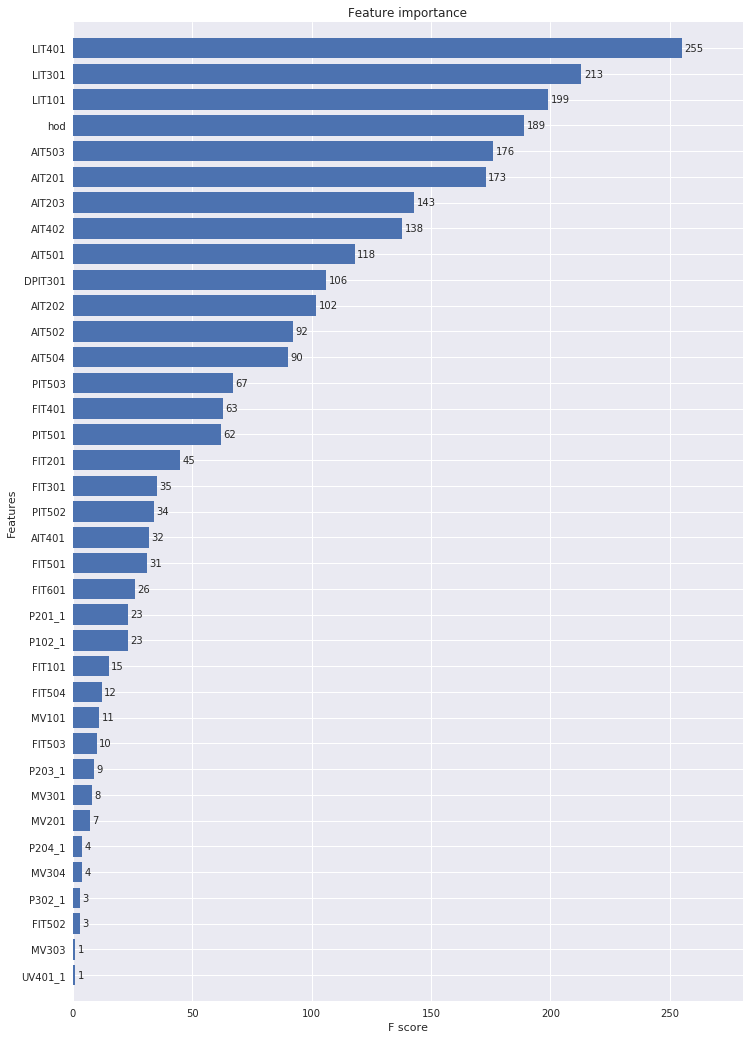

In [154]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(clf_xgb1, height=0.8, ax=ax)
plt.show()

In [ ]:
y = pdata['EVENT'] == 'Attack'

In [63]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
clf = GaussianNB()
clf.fit(X_train, y_train)

print(clf)
# make predictions
y_p = clf.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, y_p))
print(metrics.confusion_matrix(y_test, y_p))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.98      1.00      0.99    223205
       True       0.99      0.71      0.83     13475

avg / total       0.98      0.98      0.98    236680

[[223079    126]
 [  3906   9569]]
CPU times: user 1.91 s, sys: 528 ms, total: 2.44 s
Wall time: 2.43 s


# Naive Bayes on entire data with stratification on 'hod'

In [59]:
from time import time
from sklearn.model_selection import train_test_split

X = X_cat[NumFeatures[1:] + dummies]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.25)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=42, stratify=X['hod'], test_size=0.25)

In [60]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
clf = GaussianNB()
clf.fit(X_train1, y_train1)

print(clf)
# make predictions
y_p1 = clf.predict(X_test1)
# summarize the fit of the model
print(metrics.classification_report(y_test1, y_p1))
print(metrics.confusion_matrix(y_test1, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.98      1.00      0.99    223264
       True       0.99      0.71      0.83     13416

avg / total       0.98      0.98      0.98    236680

[[223145    119]
 [  3869   9547]]
CPU times: user 1.71 s, sys: 468 ms, total: 2.18 s
Wall time: 2.18 s


# Splitting Dataframe based on 'hod' and then stratifying on 'EVENT'

In [204]:
compData = X
compData['EVENT'] = pdata['EVENT'] == 'Attack'

In [206]:
compData.EVENT

309519    False
396695    False
396694    False
396693    False
396692    False
396691    False
396690    False
396689    False
396688    False
396687    False
396686    False
396685    False
396684    False
396683    False
396682    False
396681    False
396696    False
396680    False
396719    False
396721    False
396757    False
396756    False
396755    False
396754    False
396753    False
396752    False
396751    False
396750    False
396749    False
396748    False
          ...  
563977    False
563976    False
563975    False
563974    False
563973    False
563972    False
563971    False
563970    False
564062    False
564049    False
564050    False
564051    False
564067    False
564066    False
564065    False
564064    False
564017    False
564063    False
564061    False
564069    False
564060    False
564058    False
564057    False
564056    False
564055    False
564054    False
564053    False
564052    False
564059    False
50398     False
Name: EVENT, Length: 946

In [207]:
compData.sort_values(['hod'], inplace=True)

In [208]:
data0to4 = compData[compData.hod < 5]
data4to8 = compData[(compData.hod >4) & (compData.hod < 9)]
data8to12 = compData[(compData.hod >8) & (compData.hod < 13)]
data12t016 = compData[(compData.hod >12) & (compData.hod < 17)]
data16to20 = compData[(compData.hod >16) & (compData.hod < 21)]
data20to24 = compData[compData.hod >20]

In [209]:
print(len(data0to4))
print(len(data4to8))
print(len(data8to12))
print(len(data12t016))
print(len(data16to20))
print(len(data20to24))
print(len(data0to4)+len(data4to8)+len(data8to12)+len(data12t016)+len(data16to20)+len(data20to24))
print(len(compData))

198000
158400
158400
154800
158400
118719
946719
946719


In [210]:
from time import time
from sklearn.model_selection import train_test_split

datatrain1, datatest1, ytrain1, ytest1 = train_test_split(data0to4.drop(['EVENT'],axis =1),data0to4['EVENT'], random_state=42, stratify=data0to4['EVENT'], test_size=0.25)
datatrain2, datatest2, ytrain2, ytest2 = train_test_split(data4to8.drop(['EVENT'],axis =1), data4to8['EVENT'], random_state=42, stratify=data4to8['EVENT'], test_size=0.25)
datatrain3, datatest3, ytrain3, ytest3 = train_test_split(data8to12.drop(['EVENT'],axis =1), data8to12['EVENT'], random_state=42, stratify=data8to12['EVENT'], test_size=0.25)
datatrain4, datatest4, ytrain4, ytest4 = train_test_split(data12t016.drop(['EVENT'],axis =1), data12t016['EVENT'], random_state=42, stratify=data12t016['EVENT'], test_size=0.25)
datatrain5, datatest5, ytrain5, ytest5 = train_test_split(data16to20.drop(['EVENT'],axis =1), data16to20['EVENT'], random_state=42, stratify=data16to20['EVENT'], test_size=0.25)
datatrain6, datatest6, ytrain6, ytest6 = train_test_split(data20to24.drop(['EVENT'],axis =1), data20to24['EVENT'], random_state=42, stratify=data20to24['EVENT'], test_size=0.25)


# Naive Bayes

In [211]:
clf = GaussianNB()
clf.fit(datatrain1, ytrain1)

print(clf)
# make predictions
y_p1 = clf.predict(datatest1)
# summarize the fit of the model
print(metrics.classification_report(ytest1, y_p1))
print(metrics.confusion_matrix(ytest1, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.98      1.00      0.99     45983
       True       1.00      0.77      0.87      3517

avg / total       0.98      0.98      0.98     49500

[[45983     0]
 [  826  2691]]


In [212]:
clf = GaussianNB()
clf.fit(datatrain1, ytrain1)

print(clf)
# make predictions
y_p1 = clf.predict(datatest2)
# summarize the fit of the model
print(metrics.classification_report(ytest2, y_p1))
print(metrics.confusion_matrix(ytest2, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       1.00      1.00      1.00     36000
       True       1.00      1.00      1.00      3600

avg / total       1.00      1.00      1.00     39600

[[36000     0]
 [    0  3600]]


In [215]:
clf = GaussianNB()
clf.fit(datatrain1, ytrain1)

print(clf)
# make predictions
y_p1 = clf.predict(datatest3)
# summarize the fit of the model
print(metrics.classification_report(ytest3, y_p1))
print(metrics.confusion_matrix(ytest3, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.96      1.00      0.98     35892
       True       0.99      0.62      0.76      3708

avg / total       0.96      0.96      0.96     39600

[[35863    29]
 [ 1425  2283]]


In [216]:
clf = GaussianNB()
clf.fit(datatrain1, ytrain1)

print(clf)
# make predictions
y_p1 = clf.predict(datatest4)
# summarize the fit of the model
print(metrics.classification_report(ytest4, y_p1))
print(metrics.confusion_matrix(ytest4, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.97      1.00      0.98     37243
       True       0.97      0.13      0.23      1457

avg / total       0.97      0.97      0.95     38700

[[37238     5]
 [ 1270   187]]


In [220]:
clf = GaussianNB()
clf.fit(datatrain1, ytrain1)

print(clf)
# make predictions
y_p1 = clf.predict(datatest5)
# summarize the fit of the model
print(metrics.classification_report(ytest5, y_p1))
print(metrics.confusion_matrix(ytest5, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.98      1.00      0.99     38750
       True       0.00      0.00      0.00       850

avg / total       0.96      0.98      0.97     39600

[[38750     0]
 [  850     0]]


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [221]:
clf = GaussianNB()
clf.fit(datatrain1, ytrain1)

print(clf)
# make predictions
y_p1 = clf.predict(datatest6)
# summarize the fit of the model
print(metrics.classification_report(ytest6, y_p1))
print(metrics.confusion_matrix(ytest6, y_p1))

GaussianNB(priors=None)
             precision    recall  f1-score   support

      False       0.99      1.00      1.00     29337
       True       0.97      0.32      0.48       343

avg / total       0.99      0.99      0.99     29680

[[29334     3]
 [  233   110]]


# Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logistic = LogisticRegression()
logistic.fit(datatrain1, ytrain1)
y_p1_lr = logistic.predict(datatest1)

print (accuracy_score(ytest1, y_p1_lr))
print (classification_report(ytest1, y_p1_lr))

0.998121212121
             precision    recall  f1-score   support

      False       1.00      1.00      1.00     45983
       True       0.99      0.99      0.99      3517

avg / total       1.00      1.00      1.00     49500



In [224]:
logistic = LogisticRegression()
logistic.fit(datatrain1, ytrain1)
y_p1_lr = logistic.predict(datatest2)

print (accuracy_score(ytest2, y_p1_lr))
print (classification_report(ytest2, y_p1_lr))

0.845580808081
             precision    recall  f1-score   support

      False       1.00      0.83      0.91     36000
       True       0.37      1.00      0.54      3600

avg / total       0.94      0.85      0.87     39600



In [ ]:
logistic = LogisticRegression()
logistic.fit(datatrain1, ytrain1)
y_p1_lr = logistic.predict(datatest3)

print (accuracy_score(ytest3, y_p1_lr))
print (classification_report(ytest3, y_p1_lr))

In [ ]:
logistic = LogisticRegression()
logistic.fit(datatrain1, ytrain1)
y_p1_lr = logistic.predict(datatest4)

print (accuracy_score(ytest4, y_p1_lr))
print (classification_report(ytest4, y_p1_lr))

In [ ]:
logistic = LogisticRegression()
logistic.fit(datatrain1, ytrain1)
y_p1_lr = logistic.predict(datatest5)

print (accuracy_score(ytest2, y_p1_lr))
print (classification_report(ytest2, y_p1_lr))

In [ ]:
logistic = LogisticRegression()
logistic.fit(datatrain1, ytrain1)
y_p1_lr = logistic.predict(datatest2)

print (accuracy_score(ytest2, y_p1_lr))
print (classification_report(ytest2, y_p1_lr))